In [2]:
import pandas as pd
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster

In [3]:

# Set the base directory where all the monthly folders are
base_dir = r'C:\Users\emmaw\Documents\uni NL\y2\Data Challenge 2\data'

# Find all CSV files recursively that contain 'street' in their filename
street_files = glob.glob(os.path.join(base_dir, '**', '*street*.csv'), recursive=True)

# List to collect individual DataFrames
dfs = []

for file_path in street_files:
    # Read the CSV
    df = pd.read_csv(file_path)

    # Extract the police force name from the filename
    file_name = os.path.basename(file_path)

    # Collect
    dfs.append(df)

# Combine all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)


In [4]:
combined_df

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,bf6d10d97209373096729b0f2ff0cf4508f6ec41bb65b4...,2022-03,City of London Police,City of London Police,-0.107054,51.521463,On or near Saffron Street,E01000916,Camden 027B,Drugs,Court result unavailable,NaN
1,dd49133a7331e302a62075db8efa48f2fb0a44e284b0da...,2022-03,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Other theft,Investigation complete; no suspect identified,NaN
2,NaN,2022-03,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
3,8d465f19a8f9a6d20e2555f8509e32f4385d146277e6f0...,2022-03,City of London Police,City of London Police,-0.095914,51.520348,On or near Beech Street,E01000001,City of London 001A,Drugs,Court result unavailable,NaN
4,f8935071f5141f37fe1a72f377927929c6a232d92d1ec1...,2022-03,City of London Police,City of London Police,-0.095914,51.520348,On or near Beech Street,E01000001,City of London 001A,Drugs,Court result unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3414716,a6b7fed43173847fa3e8767bda4b972f9d89f7525c7378...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-2.118045,52.590344,On or near Field Street,E01010472,Wolverhampton 015B,Violence and sexual offences,Unable to prosecute suspect,NaN
3414717,876292ac623968132f2cb13deaea241b49f103cfd819f8...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-2.213480,52.189808,On or near Dent Close,E01033249,Worcester 011F,Violence and sexual offences,Unable to prosecute suspect,NaN
3414718,0f08e813c0b85b6b55a5e207475b23dfedcb5072e66e31...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-0.401725,50.823481,On or near Chippers Road,E01031840,Worthing 007E,Violence and sexual offences,Under investigation,NaN
3414719,0a11a3b169c764e68e6ceb8ce8856887e5d01ab213ce91...,2025-02,Metropolitan Police Service,Metropolitan Police Service,-2.006252,52.036228,On or near Beckford Road,E01032413,Wychavon 019F,Violence and sexual offences,Under investigation,NaN


In [5]:

df= combined_df.copy()

In [6]:
# Shape and types
print(df.shape)
print(df.dtypes)

# Preview
print(df.head())

# Missing values
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)

# Duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Unique counts
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


(3414721, 12)
Crime ID                  object
Month                     object
Reported by               object
Falls within              object
Longitude                float64
Latitude                 float64
Location                  object
LSOA code                 object
LSOA name                 object
Crime type                object
Last outcome category     object
Context                  float64
dtype: object
                                            Crime ID    Month  \
0  bf6d10d97209373096729b0f2ff0cf4508f6ec41bb65b4...  2022-03   
1  dd49133a7331e302a62075db8efa48f2fb0a44e284b0da...  2022-03   
2                                                NaN  2022-03   
3  8d465f19a8f9a6d20e2555f8509e32f4385d146277e6f0...  2022-03   
4  f8935071f5141f37fe1a72f377927929c6a232d92d1ec1...  2022-03   

             Reported by           Falls within  Longitude   Latitude  \
0  City of London Police  City of London Police  -0.107054  51.521463   
1  City of London Police  City of Londo

In [7]:
# Drop duplicates
df = df.drop_duplicates()

# Check critical columns
critical_cols = ['Longitude', 'Latitude', 'Crime type']
print(df[critical_cols].isnull().mean())

# Optional: Drop rows missing essential location data
df = df.dropna(subset=['Longitude', 'Latitude', 'Crime type'])


Longitude     0.015881
Latitude      0.015881
Crime type    0.000000
dtype: float64


In [8]:
# Total amount of crimes over all
print(f"Total crimes: {len(df)}")


Total crimes: 3012437


Month
2022-03    80275
2022-04    75844
2022-05    83652
2022-06    81083
2022-07    83744
2022-08    81793
2022-09    76252
2022-10    83213
2022-11    81341
2022-12    73948
2023-01    79022
2023-02    75394
2023-03    81653
2023-04    77895
2023-05    86626
2023-06    93964
2023-07    88978
2023-08    84599
2023-09    86013
2023-10    86427
2023-11    88089
2023-12    85463
2024-01    83321
2024-02    82770
2024-03    84100
2024-04    82775
2024-05    87367
2024-06    87232
2024-07    90298
2024-08    87848
2024-09    85788
2024-10    92076
2024-11    90425
2024-12    84776
2025-01    80543
2025-02    77850
Name: count, dtype: int64


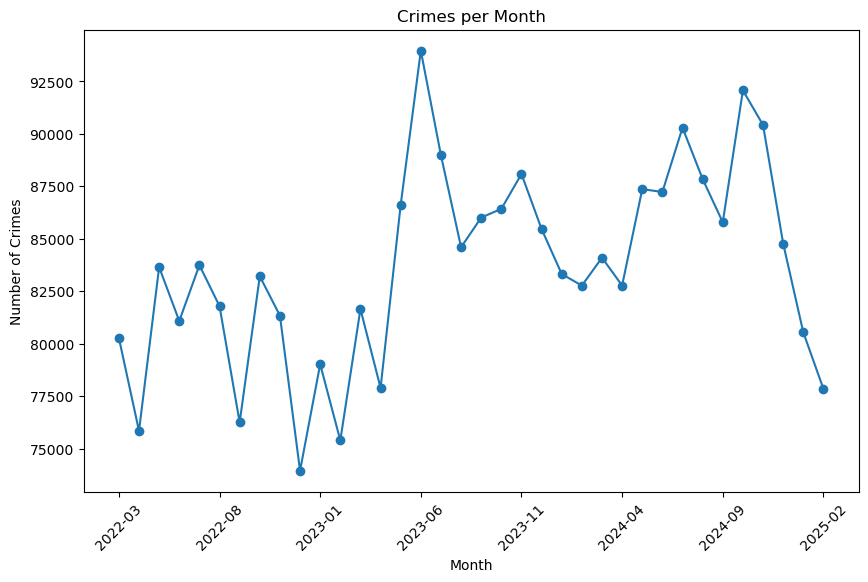

In [9]:
# Crimes per month

crimes_per_month = df['Month'].value_counts().sort_index()
print(crimes_per_month)

crimes_per_month.plot(marker='o', figsize=(10,6), title='Crimes per Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


Reported by
Metropolitan Police Service    2987315
City of London Police            25122
Name: count, dtype: int64


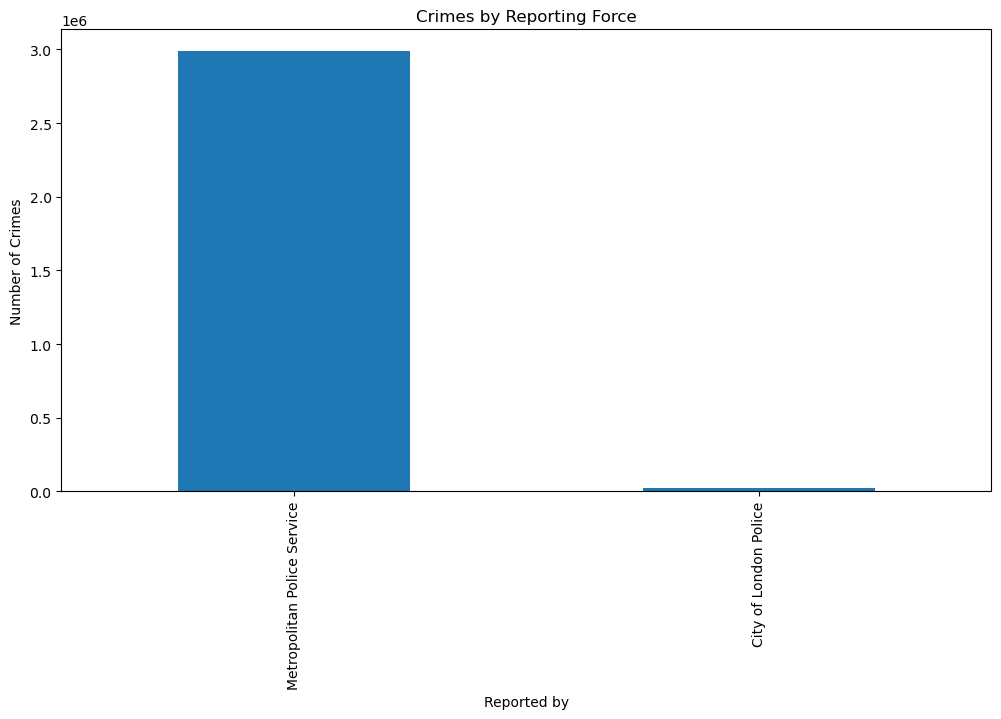

In [10]:
# Crimes by police force

crimes_by_force = df['Reported by'].value_counts()
print(crimes_by_force)

crimes_by_force.plot(kind='bar', figsize=(12,6), title='Crimes by Reporting Force')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=90)
plt.show()


Crime type
Violence and sexual offences    757731
Anti-social behaviour           368743
Other theft                     366102
Vehicle crime                   303704
Theft from the person           234319
Shoplifting                     187560
Public order                    167000
Criminal damage and arson       164346
Burglary                        159053
Drugs                           115214
Robbery                          92407
Bicycle theft                    48794
Other crime                      33277
Possession of weapons            14187
Name: count, dtype: int64


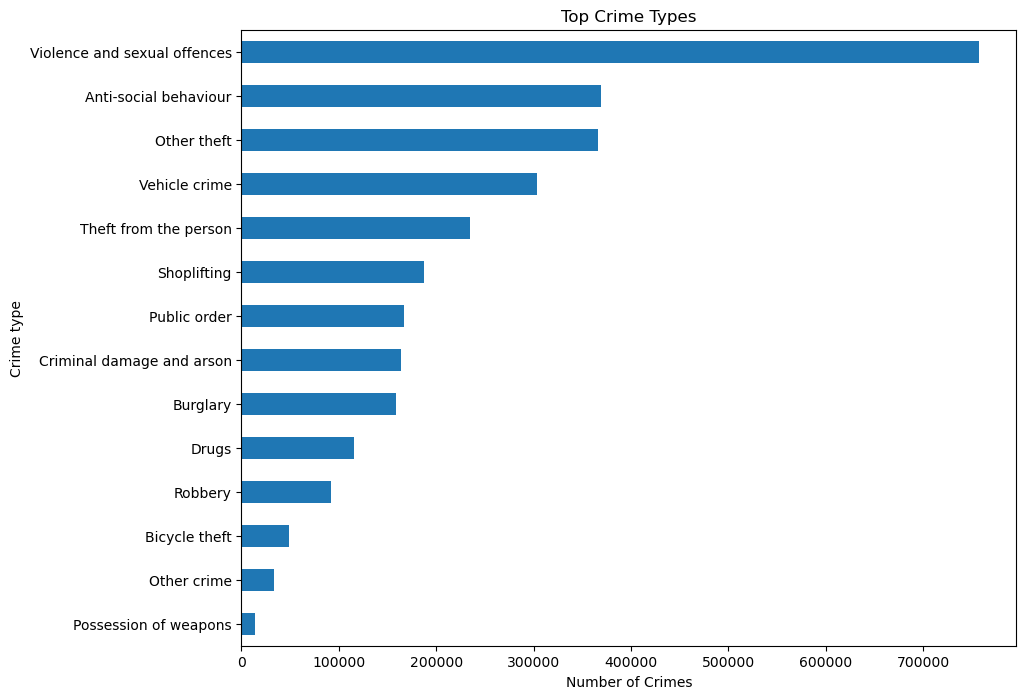

In [11]:
# Types of crimes

crime_types = df['Crime type'].value_counts()
print(crime_types)

# Plot
crime_types.plot(kind='barh', figsize=(10,8), title='Top Crime Types')
plt.xlabel('Number of Crimes')
plt.gca().invert_yaxis()
plt.show()


Location
On or near                                        115132
On or near Supermarket                            101769
On or near Shopping Area                           80657
On or near Parking Area                            72208
On or near Petrol Station                          43828
On or near Nightclub                               35800
On or near Further/Higher Educational Building     24669
On or near Theatre/Concert Hall                    24585
On or near Sports/Recreation Area                  19388
On or near Hospital                                18651
On or near Police Station                          11997
On or near Conference/Exhibition Centre             7607
On or near High Street                              7047
On or near Bus/Coach Station                        5838
On or near Park/Open Space                          5510
On or near Station Road                             4331
On or near Hills Place                              3478
On or near Bedfont Cou

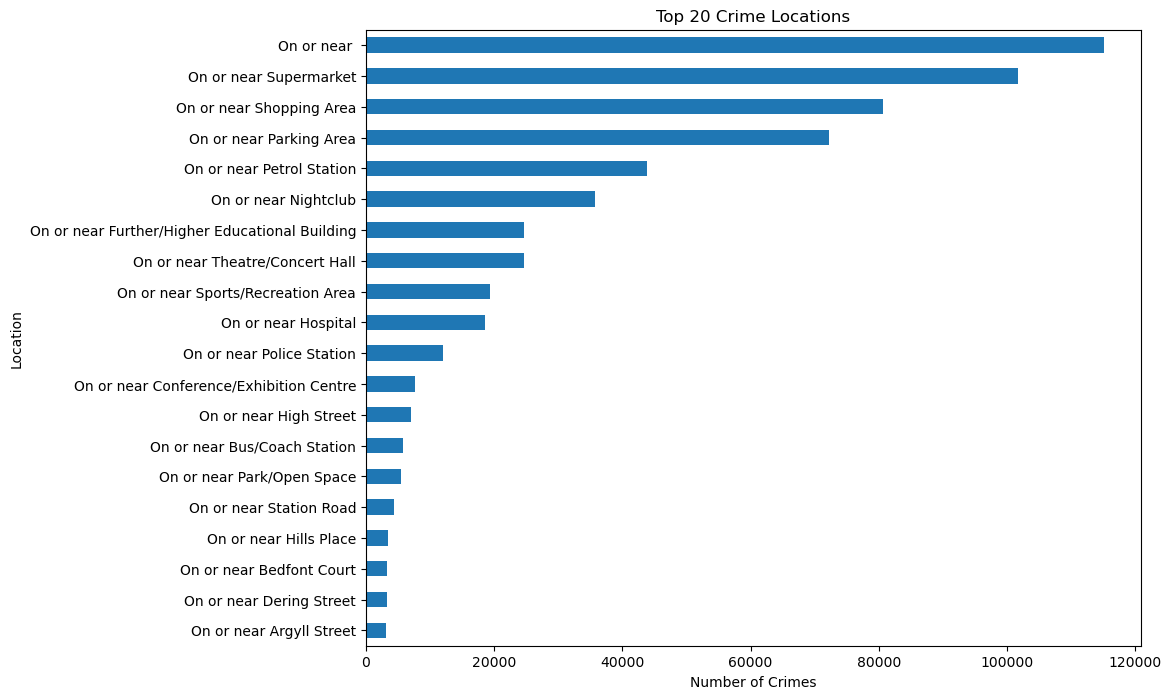

In [12]:
# Locations

top_locations = df['Location'].value_counts().head(20)
print(top_locations)

top_locations.plot(kind='barh', figsize=(10,8), title='Top 20 Crime Locations')
plt.xlabel('Number of Crimes')
plt.gca().invert_yaxis()
plt.show()


Last outcome category
Investigation complete; no suspect identified          1950552
NaN                                                     368743
Unable to prosecute suspect                             279323
Status update unavailable                               144588
Under investigation                                      93787
Court result unavailable                                 67872
Local resolution                                         50094
Awaiting court outcome                                   27804
Offender given a caution                                  9893
Offender given penalty notice                             9314
Action to be taken by another organisation                6744
Further investigation is not in the public interest       1499
Formal action is not in the public interest               1393
Offender given a drugs possession warning                  563
Further action is not in the public interest               156
Suspect charged as part of anothe

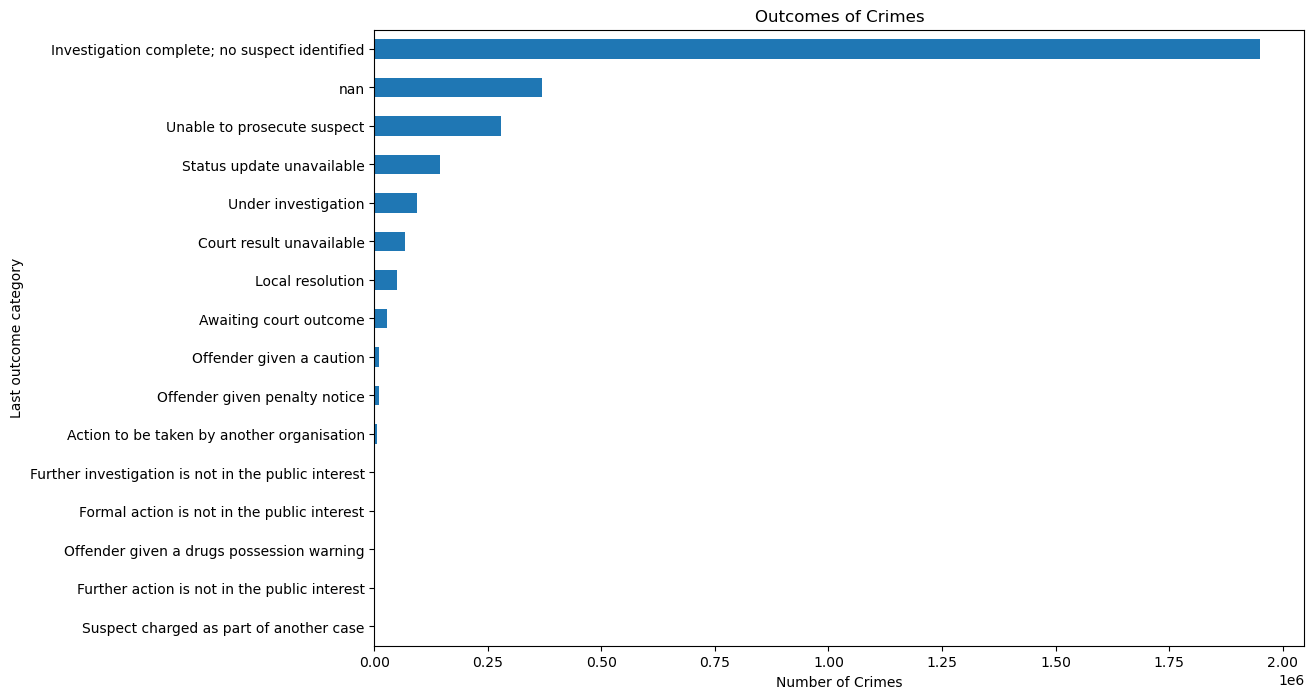

In [13]:
# Outcomes

outcomes = df['Last outcome category'].value_counts(dropna=False)
print(outcomes)

outcomes.plot(kind='barh', figsize=(12,8), title='Outcomes of Crimes')
plt.xlabel('Number of Crimes')
plt.gca().invert_yaxis()
plt.show()


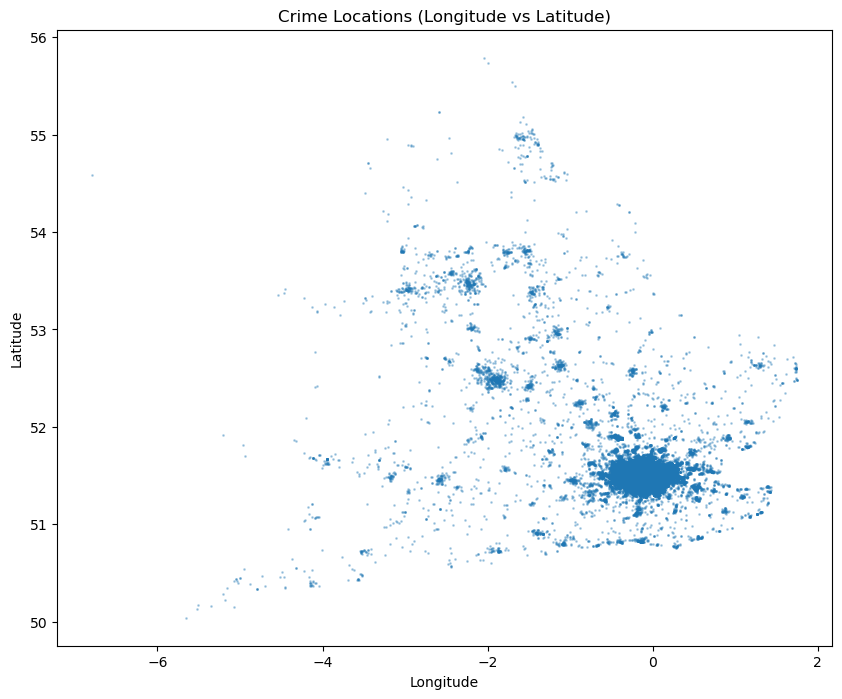

In [14]:
# Geospatial analysis

# Simple plot of longitude and latitude
plt.figure(figsize=(10,8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.3, s=1)
plt.title('Crime Locations (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


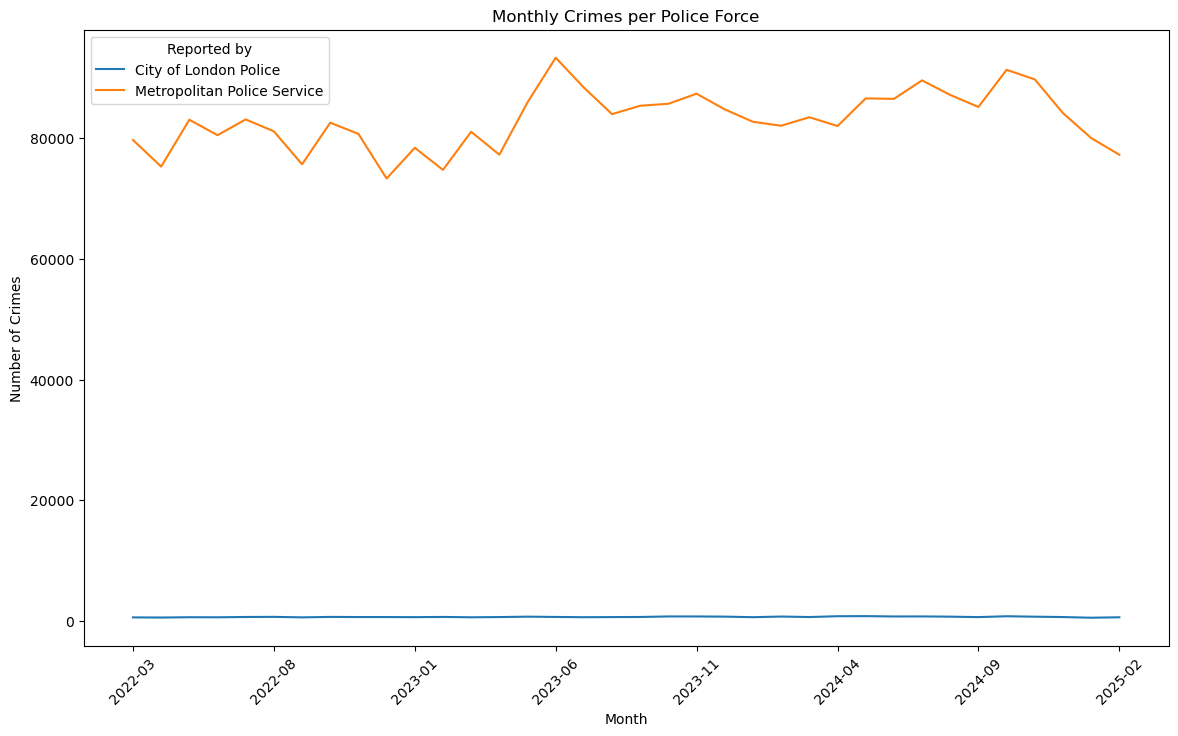

In [15]:
# Crimes over time per force

monthly_force = df.groupby(['Month', 'Reported by']).size().unstack(fill_value=0)
monthly_force.plot(figsize=(14,8), title='Monthly Crimes per Police Force')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()


Last outcome category         Action to be taken by another organisation  \
Crime type                                                                 
Bicycle theft                                                          6   
Burglary                                                               6   
Criminal damage and arson                                             53   
Drugs                                                                 11   
Other crime                                                           98   
Other theft                                                           93   
Possession of weapons                                                  4   
Public order                                                          51   
Robbery                                                                9   
Shoplifting                                                          395   
Theft from the person                                                 54   
Vehicle crim

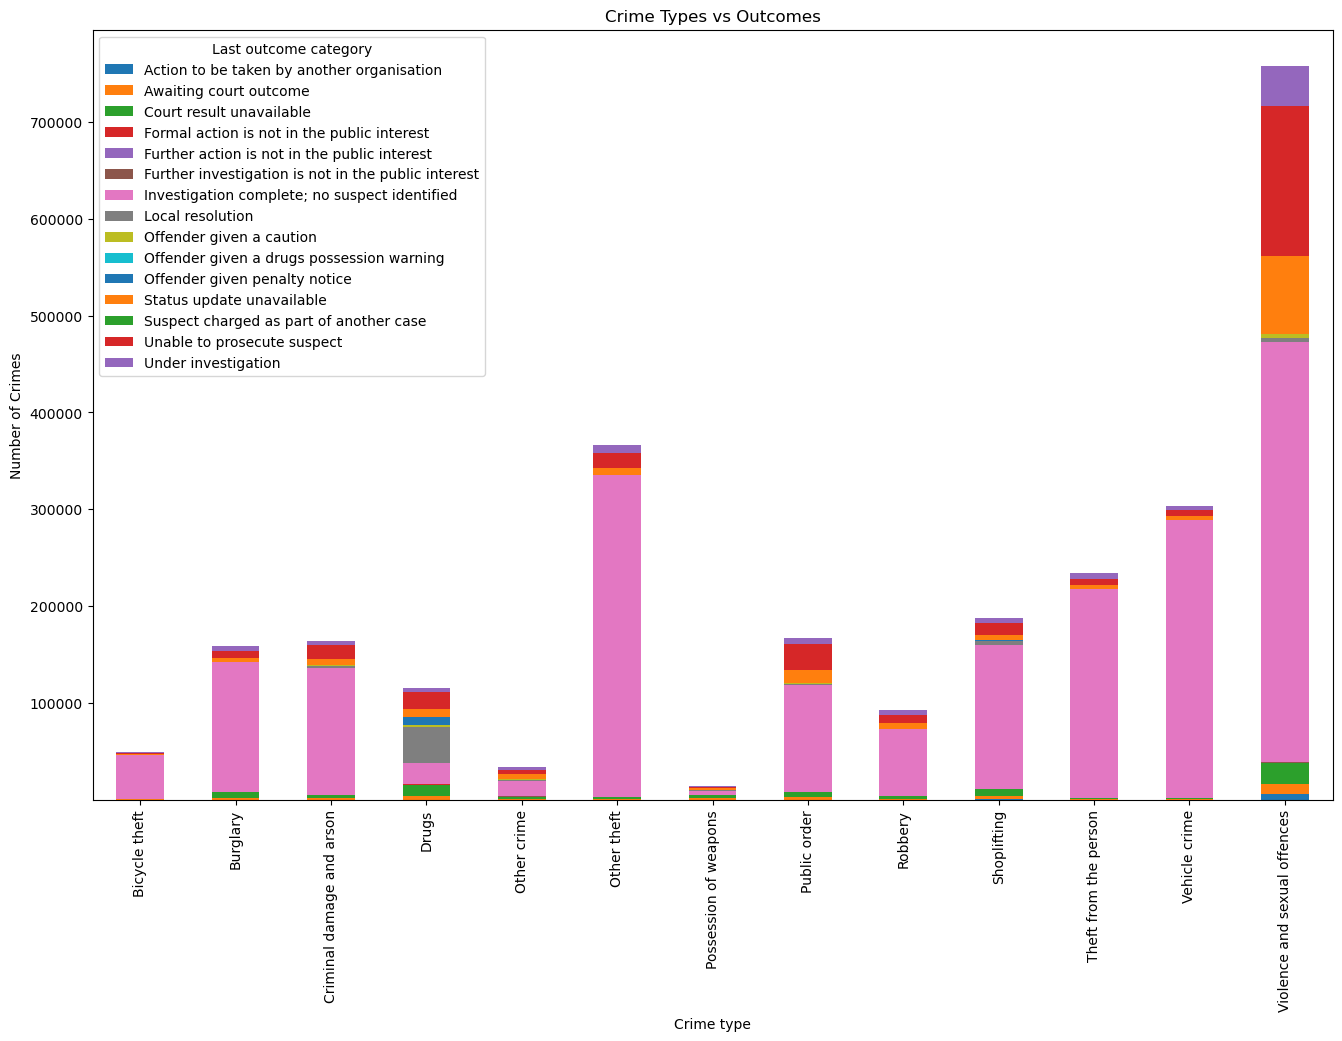

In [16]:
# Crimes by crime types and outcome

cross_tab = pd.crosstab(df['Crime type'], df['Last outcome category'])
print(cross_tab)

# Optional: plot
cross_tab.plot(kind='bar', stacked=True, figsize=(16,10))
plt.title('Crime Types vs Outcomes')
plt.ylabel('Number of Crimes')
plt.show()


In [17]:

# Make sure df is filtered to London area
# You already have only London forces ("City of London Police" and "Metropolitan Police Service"), so good!

# Create a base map centered over London
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=11, tiles='cartodb positron')

# Create a marker cluster (so many points don't clutter the map)
marker_cluster = MarkerCluster().add_to(london_map)

# Sample if there are too many points (optional, speeds up rendering)
sample_df = df.sample(5000) if len(df) > 5000 else df

# Plot each crime as a point
for idx, row in sample_df.iterrows():
    location = [row['Latitude'], row['Longitude']]
    popup_info = (f"Crime Type: {row['Crime type']}<br>"
                  f"Location: {row['Location']}<br>"
                  f"Outcome: {row['Last outcome category']}")
    
    folium.Marker(
        location=location,
        popup=popup_info,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

# Save the map as an HTML file
london_map.save('london_crime_map.html')


In [18]:
# Filter for burglary crimes
burglary_df = df[df['Crime type'].str.lower() == 'burglary'].copy()

print(f"Total number of burglary crimes: {len(burglary_df)}")
burglary_df.head()


Total number of burglary crimes: 159053


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
63,cfa86c68d9769e84c5b01ef3c93338f0dd47eb4d5e5a56...,2022-03,City of London Police,City of London Police,-0.075389,51.511775,On or near Minories,E01000005,City of London 001E,Burglary,Unable to prosecute suspect,NaN
147,c9ff1a2077ab3580b1d971524a86bf9dabda6e51f46b2d...,2022-03,City of London Police,City of London Police,-0.083645,51.512504,On or near Lime Street Passage,E01032739,City of London 001F,Burglary,Investigation complete; no suspect identified,NaN
148,ad281a223550a1b218ac61b9c35f27769ba8b93d1c8792...,2022-03,City of London Police,City of London Police,-0.086175,51.510945,On or near Gracechurch Street,E01032739,City of London 001F,Burglary,Investigation complete; no suspect identified,NaN
149,35a8bd20bd7f41454d33c1235a12b7a67d36a59673c8cd...,2022-03,City of London Police,City of London Police,-0.084284,51.510671,On or near Eastcheap,E01032739,City of London 001F,Burglary,Investigation complete; no suspect identified,NaN
150,65ec3d15b8a061d9e6d81d09dd695109e60fe4520923cd...,2022-03,City of London Police,City of London Police,-0.078665,51.509950,On or near Muscovy Street,E01032739,City of London 001F,Burglary,Unable to prosecute suspect,NaN


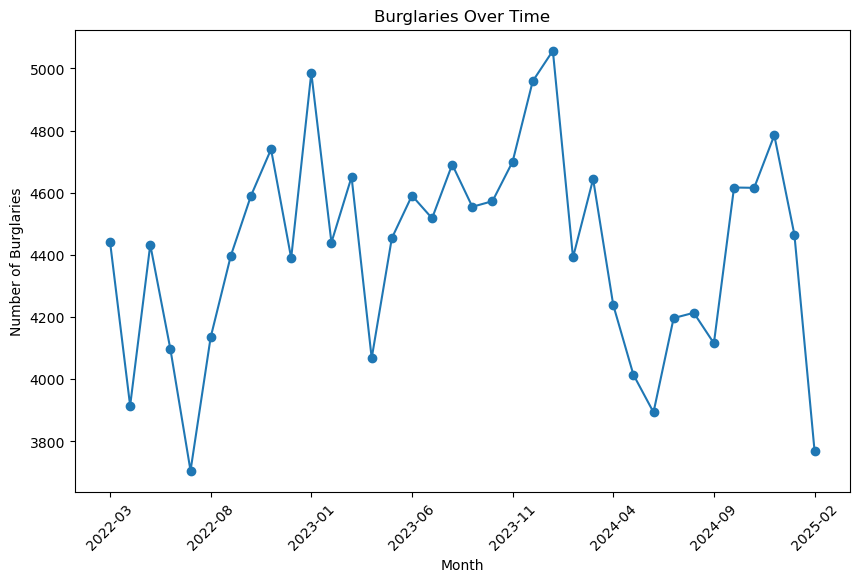

In [19]:
# Burglaries per month
burglary_per_month = burglary_df['Month'].value_counts().sort_index()

# Plot
burglary_per_month.plot(marker='o', figsize=(10,6), title='Burglaries Over Time')
plt.ylabel('Number of Burglaries')
plt.xticks(rotation=45)
plt.show()


Location
On or near Supermarket                            3525
On or near                                        3336
On or near Parking Area                           2656
On or near Shopping Area                          2099
On or near Petrol Station                         1514
On or near Further/Higher Educational Building     985
On or near Theatre/Concert Hall                    853
On or near Nightclub                               748
On or near Sports/Recreation Area                  708
On or near Hospital                                484
On or near Conference/Exhibition Centre            333
On or near High Street                             277
On or near Bus/Coach Station                       198
On or near Police Station                          197
On or near Station Road                            179
On or near Park/Open Space                         178
On or near Station Approach                        157
On or near The Drive                               140
O

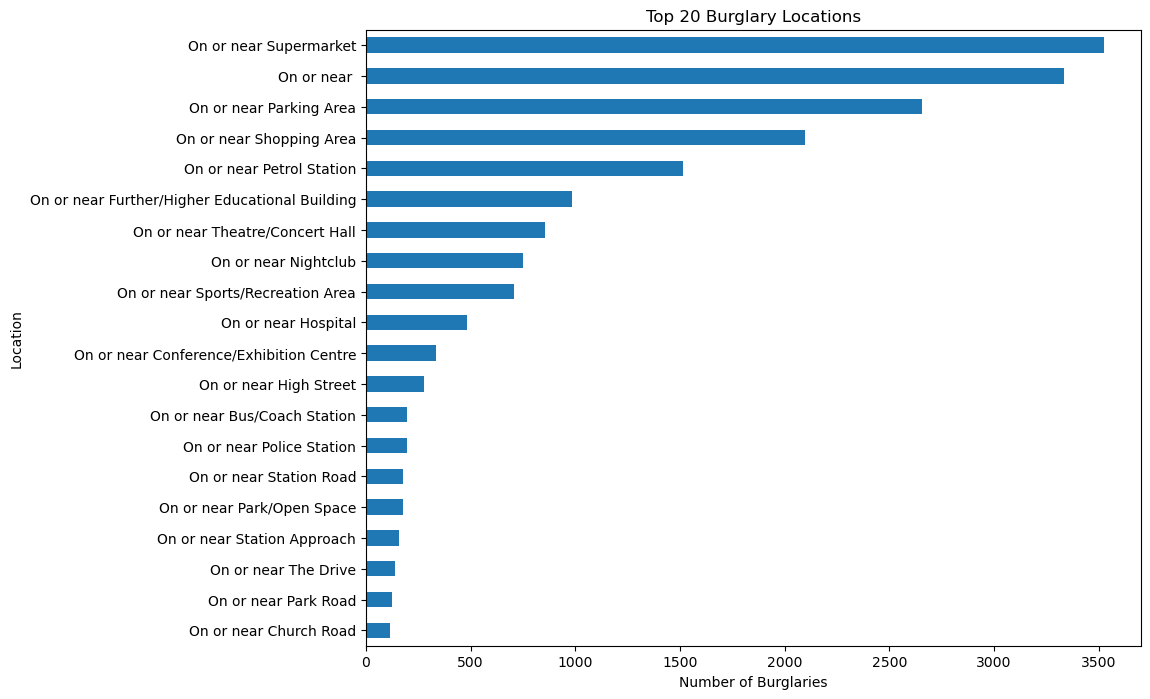

In [20]:
# Top 20 locations
top_burglary_locations = burglary_df['Location'].value_counts().head(20)
print(top_burglary_locations)

# Plot
top_burglary_locations.plot(kind='barh', figsize=(10,8), title='Top 20 Burglary Locations')
plt.xlabel('Number of Burglaries')
plt.gca().invert_yaxis()
plt.show()


Last outcome category
Investigation complete; no suspect identified          134214
Unable to prosecute suspect                              7175
Court result unavailable                                 5986
Under investigation                                      5214
Status update unavailable                                4288
Awaiting court outcome                                   1848
Offender given a caution                                  110
Local resolution                                           88
Suspect charged as part of another case                    77
Formal action is not in the public interest                37
Further investigation is not in the public interest         7
Action to be taken by another organisation                  6
Offender given penalty notice                               2
Further action is not in the public interest                1
Name: count, dtype: int64


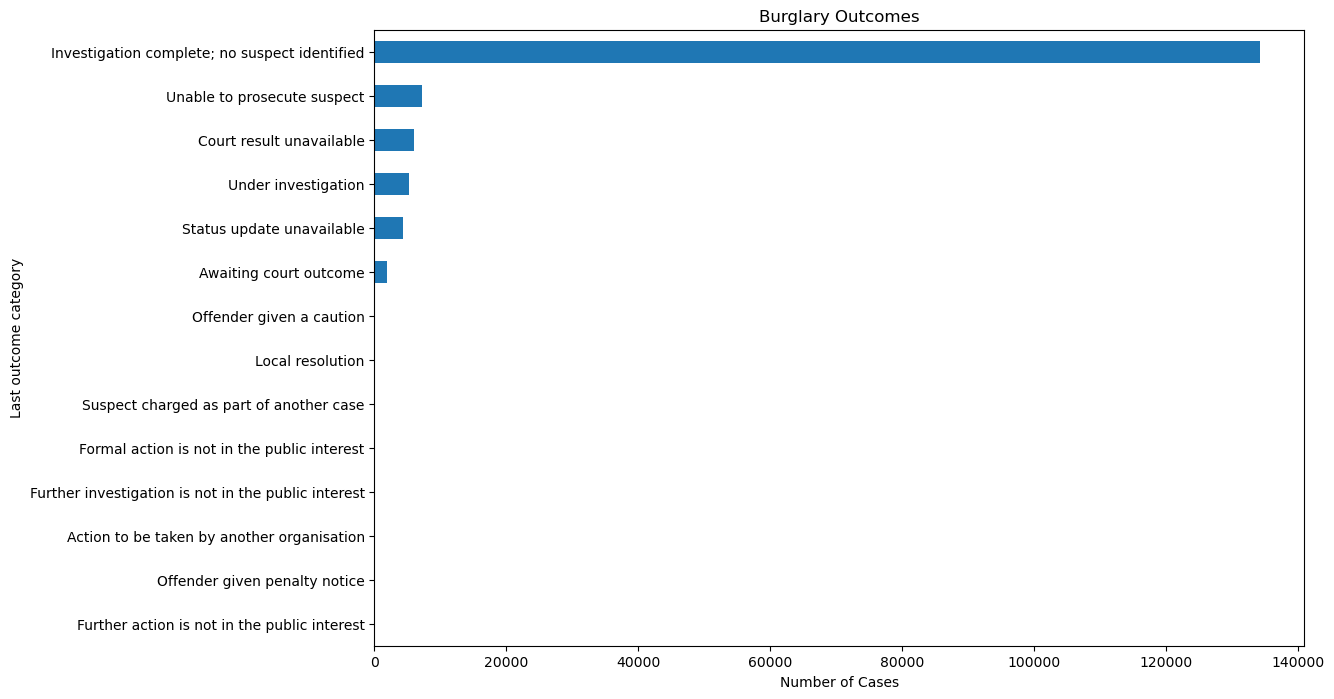

In [21]:
burglary_outcomes = burglary_df['Last outcome category'].value_counts(dropna=False)

# Display
print(burglary_outcomes)

# Plot
burglary_outcomes.plot(kind='barh', figsize=(12,8), title='Burglary Outcomes')
plt.xlabel('Number of Cases')
plt.gca().invert_yaxis()
plt.show()


In [22]:

# Create a base map centered on London
burglary_map = folium.Map(location=[51.509865, -0.118092], zoom_start=11, tiles='cartodb positron')

# Marker cluster
marker_cluster = MarkerCluster().add_to(burglary_map)

# Sample if dataset is too large
sample_burglary = burglary_df.sample(3000) if len(burglary_df) > 3000 else burglary_df

# Add points
for idx, row in sample_burglary.iterrows():
    location = [row['Latitude'], row['Longitude']]
    popup_info = (f"Location: {row['Location']}<br>"
                  f"Outcome: {row['Last outcome category']}")
    
    folium.Marker(
        location=location,
        popup=popup_info,
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(marker_cluster)

# Save
burglary_map.save('london_burglary_map.html')

# Optional: Open automatically
import webbrowser
webbrowser.open('london_burglary_map.html')


True